In [51]:
import numpy as np
import pandas as pd

In [52]:
df = pd.read_csv('Task_1.csv')

In [53]:
df.shape

(16716, 2)

In [54]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Removing Duplicate Items

In [55]:
df['labels'] = encoder.fit_transform(df['labels'])

In [56]:
df.duplicated().sum()

1331

In [57]:
df = df.drop_duplicates(keep='first')

In [58]:
df.shape

(15385, 2)

In [59]:
df['labels'].value_counts()

labels
0    13471
1     1914
Name: count, dtype: int64

# Representing Spam and Ham messages

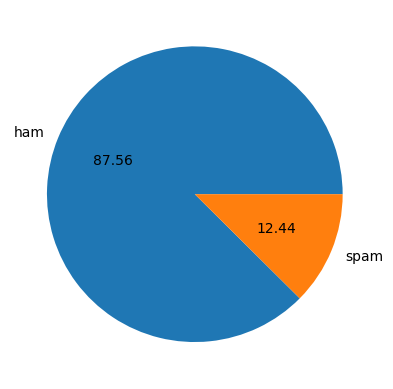

In [60]:
import matplotlib.pyplot as plt
plt.pie(df['labels'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [61]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/himanshupragyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
df['num_characters'] = df['text'].apply(len)
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [63]:
#ham
df[df['labels'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,13471.000000,13471.000000,13471.000000
mean,76.209339,17.206666,1.605894
std,64.330283,15.077013,1.249876
min,2.000000,1.000000,1.000000
25%,36.000000,8.000000,1.000000
50%,55.000000,13.000000,1.000000
75%,98.000000,22.000000,2.000000
max,1019.000000,510.000000,38.000000


In [64]:
#spam
df[df['labels'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1914.000000,1914.000000,1914.000000
mean,149.808777,28.345350,2.943574
std,35.372722,7.323769,1.483117
min,7.000000,2.000000,1.000000
25%,137.000000,25.000000,2.000000
50%,156.000000,29.000000,3.000000
75%,173.000000,33.000000,4.000000
max,262.000000,58.000000,9.000000


In [65]:
import seaborn as sns

# Representing the amount of Spam v/s Ham messages in form of Graph

<Axes: xlabel='num_characters', ylabel='Count'>

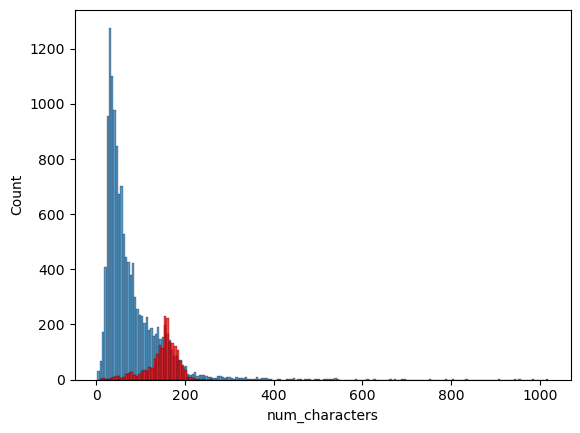

In [66]:
plt.figure()
sns.histplot(df[df['labels'] == 0]['num_characters'])
sns.histplot(df[df['labels'] == 1]['num_characters'],color='red')

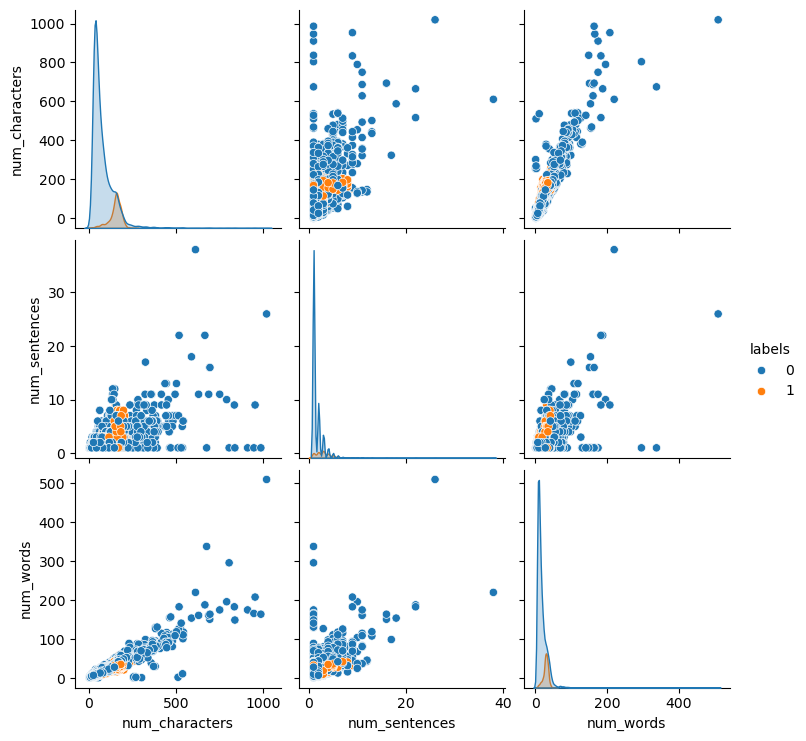

In [67]:
sns.pairplot(df,hue='labels')

In [68]:
import nltk

In [69]:
from nltk.stem.porter import PorterStemmer

In [70]:
ps = PorterStemmer()

In [71]:
import string

# Removing punctuation marks and Stemming the Data

In [72]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [73]:
df['transformed_text'] = df['text'].apply(transform_text)

In [74]:
df.head()

,labels,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [77]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [78]:
spam_wc = wc.generate(df[df['labels'] == 1]['transformed_text'].str.cat(sep=" "))

# Representing the most frequent Spam and Ham messages

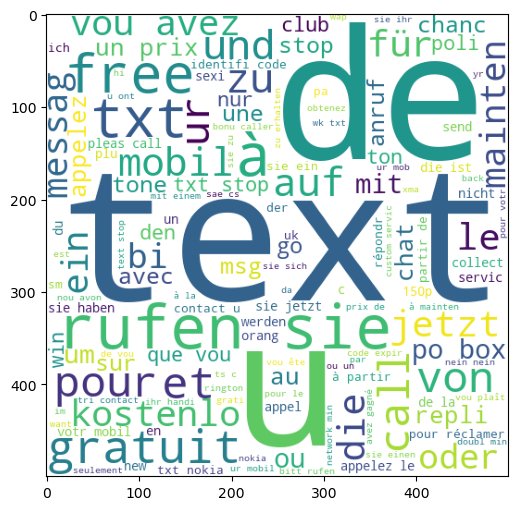

In [79]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [80]:
ham_wc = wc.generate(df[df['labels'] == 0]['transformed_text'].str.cat(sep=" "))

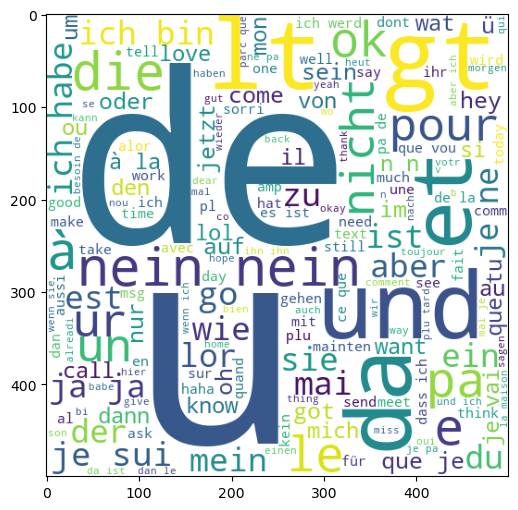

In [82]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [85]:
spam_corpus = []
for msg in df[df['labels'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [86]:
len(spam_corpus)

37523

In [88]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

(0         sie
 1          de
 2           2
 3         txt
 4           à
 5        call
 6          le
 7           u
 8        text
 9        pour
 10         ur
 11          4
 12        vou
 13         zu
 14       stop
 15      mobil
 16       free
 17         un
 18      rufen
 19       votr
 20        ihr
 21        ein
 22    gratuit
 23    appelez
 24        auf
 25      nokia
 26        für
 27        von
 28       oder
 29         ou
 Name: 0, dtype: object,
 0     666
 1     594
 2     468
 3     412
 4     389
 5     343
 6     336
 7     329
 8     328
 9     316
 10    312
 11    283
 12    279
 13    274
 14    268
 15    253
 16    228
 17    224
 18    223
 19    223
 20    194
 21    186
 22    179
 23    171
 24    168
 25    161
 26    159
 27    156
 28    155
 29    152
 Name: 1, dtype: int64)

In [89]:
ham_corpus = []
for msg in df[df['labels'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [90]:
len(ham_corpus)

151115

In [92]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1]

(0       ich
 1        de
 2         u
 3        je
 4       sie
 5        le
 6       que
 7         à
 8        pa
 9        la
 10       du
 11       es
 12    nicht
 13      ist
 14       da
 15       zu
 16      und
 17       gt
 18       lt
 19      vou
 20        2
 21       et
 22       un
 23      ein
 24       tu
 25       ne
 26      die
 27     pour
 28        n
 29     nein
 Name: 0, dtype: object,
 0     2805
 1     2354
 2     2139
 3     1974
 4     1507
 5     1341
 6     1250
 7     1206
 8     1124
 9      965
 10     962
 11     943
 12     932
 13     927
 14     920
 15     900
 16     851
 17     849
 18     844
 19     841
 20     814
 21     806
 22     780
 23     748
 24     662
 25     642
 26     633
 27     616
 28     565
 29     540
 Name: 1, dtype: int64)

# Transforming the words from String to Vectors

In [93]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [94]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [95]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
X.shape

(15385, 3000)

In [99]:
y = df['labels'].values

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Training defferent modes: GNB,MNB and BNB

In [102]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [103]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [116]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7949301267468313
[[2099  604]
 [  27  347]]
0.3648790746582545


In [115]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9824504387390315
[[2699    4]
 [  50  324]]
0.9878048780487805


In [117]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9879753006174845
[[2696    7]
 [  30  344]]
0.98005698005698


In [119]:
models = {
    "MNB":mnb,
    "GNB":gnb,
    "BNB":bnb,
}

In [121]:
accuracy_scores = []
precision_scores = []

for name,model in models.items():
    
    current_accuracy,current_precision = train_classifier(model, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  MNB
Accuracy -  0.9824504387390315
Precision -  0.9878048780487805
For  GNB
Accuracy -  0.7949301267468313
Precision -  0.3648790746582545
For  BNB
Accuracy -  0.9879753006174845
Precision -  0.98005698005698


# Analyzing different Data Models

In [123]:
performance_df = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [124]:
performance_df

,Algorithm,Accuracy,Precision
0,MNB,0.982450,0.987805
2,BNB,0.987975,0.980057
1,GNB,0.794930,0.364879


# MNB performs best

# Showing the Accuracy Report ie 98.2%

In [125]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.9824504387390315


# Showing Precision Report ie 98.7%

In [129]:
y_pred2 = mnb.predict(X_test)
print(precision_score(y_test,y_pred2))

0.9878048780487805


# Showing Confusion Matrix

In [128]:
y_pred2 = mnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))

[[2696    7]
 [  30  344]]
